# Telecommunication Industry Data Analysis

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [101]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Stella\Desktop\Machine_Learning\twitter_analytics\twitteranalytics\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [21]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Stella\Desktop\Machine_Learning\twitter_analytics\twitteranalytics\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
from Scripts import Read_Data

ImportError: cannot import name 'Read_Data' from 'Scripts' (unknown location)

In [8]:
from scipy.stats import skew

## Reading the data

In [11]:
data = pd.read_excel('../Data/Week1_challenge_data_source.xlsx')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [306]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)# To expand the number of viable columns in the dataframe
data = pd.read_excel('../Data/Week1_challenge_data_source.xlsx', na_values=['?', None])
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [307]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [308]:
# to display number of rows and columns 
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


In [309]:
data.isna().mean().round(4)*100

Bearer Id                                    0.66
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.38
MSISDN/Number                                0.71
IMEI                                         0.38
Last Location Name                           0.77
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.76
TCP UL Retrans. Vol (Bytes)                 64.43
DL TP < 50 Kbps (%)                          0.50
50 Kbps < DL TP < 250 Kbps (%)               0.50
250 Kbps < DL TP < 1 Mbps (%)                0.50
DL TP > 1 Mbps (%)                           0.50


In [310]:
data.shape

(150001, 55)

## Data Cleaning

In [311]:
# Dropping rows with columns containing unpredictable Identifiers: IMSI, MSISDN/Number, IMEI, Handset Manufacturer, Handset Type
df_dropped= data.dropna(subset=['IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type', 'Last Location Name'])
df_dropped.shape

(148346, 55)

In [312]:
df_dropped.isna().mean().round(4)*100

Bearer Id                                    0.00
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.00
MSISDN/Number                                0.00
IMEI                                         0.00
Last Location Name                           0.00
Avg RTT DL (ms)                             18.60
Avg RTT UL (ms)                             18.59
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 59.11
TCP UL Retrans. Vol (Bytes)                 64.73
DL TP < 50 Kbps (%)                          0.46
50 Kbps < DL TP < 250 Kbps (%)               0.46
250 Kbps < DL TP < 1 Mbps (%)                0.46
DL TP > 1 Mbps (%)                           0.46


In [313]:
df_dropped.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                               0
Avg RTT DL (ms)                              27598
Avg RTT UL (ms)                              27578
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87681
TCP UL Retrans. Vol (Bytes)                  96029
DL TP < 50 Kbps (%)                            688
50 Kbps < DL TP < 250 Kbps (%)                 688
250 Kbps < DL TP < 1 Mbps (%)                  688
DL TP > 1 Mbps (%)             

In [314]:
# Functions to backward fill and forward fill columns  
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill',axis = 1)
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]


In [ ]:
# Functions to fill missing columns with mean, median, mode
#using median
df['Column'].fillna(df['column'].median(), inplace=True)
  
# Using mean
df['column'].fillna(int(df['column'].mean()), inplace=True)
  
# Using mode
df['column'].fillna(int(df['Salary'].mode()), inplace=True)
# By Interpolation
df_clean = df_dropped.interpolate(method='ffill')

df_clean = df_dropped.interpolate(method='bfill')


In [18]:
# Calculating skewness of each column 
df_dropped.skew(axis='index', skipna=True)

Bearer Id                                     0.021424
Start ms                                      0.000499
End ms                                       -0.000738
Dur. (ms)                                     3.969863
IMSI                                       -269.208189
MSISDN/Number                               331.498405
IMEI                                          1.068722
Avg RTT DL (ms)                              67.061903
Avg RTT UL (ms)                              28.611111
Avg Bearer TP DL (kbps)                       2.589701
Avg Bearer TP UL (kbps)                       4.496712
TCP DL Retrans. Vol (Bytes)                  15.844908
TCP UL Retrans. Vol (Bytes)                  83.299761
DL TP < 50 Kbps (%)                          -2.302061
50 Kbps < DL TP < 250 Kbps (%)                3.282171
250 Kbps < DL TP < 1 Mbps (%)                 4.575920
DL TP > 1 Mbps (%)                            5.359140
UL TP < 10 Kbps (%)                          -8.997207
10 Kbps < 

In [317]:
# Using mean to fill all missing values 
df_dropped['Avg RTT DL (ms)'].fillna(int(df_dropped['Avg RTT DL (ms)'].mean()), inplace=True)
df_dropped['Avg RTT UL (ms)'].fillna(int(df_dropped['Avg RTT UL (ms)'].mean()), inplace=True)
df_dropped['TCP DL Retrans. Vol (Bytes)'].fillna(int(df_dropped['TCP DL Retrans. Vol (Bytes)'].mean()), inplace=True)
df_dropped['TCP UL Retrans. Vol (Bytes)'].fillna(int(df_dropped['TCP UL Retrans. Vol (Bytes)'].mean()), inplace=True)
df_dropped['DL TP < 50 Kbps (%)'].fillna(int(df_dropped['DL TP < 50 Kbps (%)'].mean()), inplace=True)
df_dropped['50 Kbps < DL TP < 250 Kbps (%)'].fillna(int(df_dropped['50 Kbps < DL TP < 250 Kbps (%)'].mean()), inplace=True)
df_dropped['250 Kbps < DL TP < 1 Mbps (%)'].fillna(int(df_dropped['250 Kbps < DL TP < 1 Mbps (%)'].mean()), inplace=True)
df_dropped['DL TP > 1 Mbps (%)'].fillna(int(df_dropped['DL TP > 1 Mbps (%)'].mean()), inplace=True)
df_dropped['UL TP < 10 Kbps (%)'].fillna(int(df_dropped['UL TP < 10 Kbps (%)'].mean()), inplace=True)
df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].fillna(int(df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].mean()), inplace=True)
df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].fillna(int(df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].mean()), inplace=True)
df_dropped['50 Kbps < UL TP < 300 Kbps (%)'].fillna(int(df_dropped['50 Kbps < UL TP < 300 Kbps (%)'].mean()), inplace=True)
df_dropped['UL TP > 300 Kbps (%)'].fillna(int(df_dropped['UL TP > 300 Kbps (%)'].mean()), inplace=True)
df_dropped['HTTP DL (Bytes)'].fillna(int(df_dropped['HTTP DL (Bytes)'].mean()), inplace=True)
df_dropped['HTTP UL (Bytes)'].fillna(int(df_dropped['HTTP UL (Bytes)'].mean()), inplace=True)
df_dropped['Nb of sec with 125000B < Vol DL'].fillna(int(df_dropped['Nb of sec with 125000B < Vol DL'].mean()), inplace=True)
df_dropped['Nb of sec with 1250B < Vol UL < 6250B'].fillna(int(df_dropped['Nb of sec with 1250B < Vol UL < 6250B'].mean()), inplace=True)
df_dropped['Nb of sec with 31250B < Vol DL < 125000B'].fillna(int(df_dropped['Nb of sec with 31250B < Vol DL < 125000B'].mean()), inplace=True)
df_dropped['Nb of sec with 37500B < Vol UL'].fillna(int(df_dropped['Nb of sec with 37500B < Vol UL'].mean()), inplace=True)
df_dropped['Nb of sec with 6250B < Vol DL < 31250B'].fillna(int(df_dropped['Nb of sec with 6250B < Vol DL < 31250B'].mean()), inplace=True)
df_dropped['Nb of sec with 6250B < Vol UL < 37500B'].fillna(int(df_dropped['Nb of sec with 6250B < Vol UL < 37500B'].mean()), inplace=True)
df_dropped['Nb of sec with Vol DL < 6250B'].fillna(int(df_dropped['Nb of sec with Vol DL < 6250B'].mean()), inplace=True)
df_dropped['Nb of sec with Vol UL < 1250B'].fillna(int(df_dropped['Nb of sec with Vol UL < 1250B'].mean()), inplace=True)

In [318]:
df_dropped.isna().mean().round(4)*100

Bearer Id                                   0.0
Start                                       0.0
Start ms                                    0.0
End                                         0.0
End ms                                      0.0
Dur. (ms)                                   0.0
IMSI                                        0.0
MSISDN/Number                               0.0
IMEI                                        0.0
Last Location Name                          0.0
Avg RTT DL (ms)                             0.0
Avg RTT UL (ms)                             0.0
Avg Bearer TP DL (kbps)                     0.0
Avg Bearer TP UL (kbps)                     0.0
TCP DL Retrans. Vol (Bytes)                 0.0
TCP UL Retrans. Vol (Bytes)                 0.0
DL TP < 50 Kbps (%)                         0.0
50 Kbps < DL TP < 250 Kbps (%)              0.0
250 Kbps < DL TP < 1 Mbps (%)               0.0
DL TP > 1 Mbps (%)                          0.0
UL TP < 10 Kbps (%)                     

## 1. User overview Analysis

### Grouping data by handset type used by customer

In [319]:
Total_handsets = df_dropped ['Handset Type'].value_counts()
Total_handsets.head()

Huawei B528S-23A           19724
Apple iPhone 6S (A1688)     9391
Apple iPhone 6 (A1586)      8991
undefined                   8892
Apple iPhone 7 (A1778)      6274
Name: Handset Type, dtype: int64

### Grouping data by handset manufacturers

In [320]:
Tot_handset_man = df_dropped['Handset Manufacturer'].value_counts()
Tot_handset_man.head()

Apple                            59304
Samsung                          40393
Huawei                           34269
undefined                         8892
Sony Mobile Communications Ab      956
Name: Handset Manufacturer, dtype: int64

In [322]:
list(df_dropped.groupby('Handset Manufacturer')['Handset Type'].apply(list).values)

[['A-Link Telecom I. Cubot X18 Plus',
  'A-Link Telecom I. Cubot A5',
  'A-Link Telecom I. Cubot X18 Plus',
  'A-Link Telecom I. Cubot Power',
  'A-Link Telecom I. Cubot Note Plus',
  'A-Link Telecom I. Cubot Note S',
  'A-Link Telecom I. Cubot Nova',
  'A-Link Telecom I. Cubot R9'],
 ['Asustek Asus Ze550Kl Zenfone2 Laser',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zenfone2 Laser Ze600Kl',
  'Asustek Asus Zenfone 2 Laser Ze500Kl',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone2 Laser Ze600Kl',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone 2 Laser Ze500Kl',
  'Asustek Asus Zenfone Selfie Zd551Kl',
  'Asustek Asus Zenfone2 Laser Ze600Kl',
  'Asustek Asus Zenfone 2 Laser Ze500Kl',
  'Asustek Asus Zenfone2 Laser Ze60

In [323]:
data_grouped = df_dropped.groupby(["Handset Type", "Handset Manufacturer"])
grand_output = pd.DataFrame(columns = ["Handset Type", "Handset Manufacturer", "COUNT"])

for group_name, group in data_grouped: 
    # output dataframe for group
    output = pd.DataFrame(columns=[])
    res = group.groupby(["Handset Type"]).size().reset_index(name="COUNT")
    # create dataframe of res and W, X, Y columns
    output = pd.concat([pd.DataFrame([list(group_name)]*len(res), columns=["Handset Type", "Handset Manufacturer"]), res], axis=1, ignore_index=True)
    output.columns = ["Handset Type", "Handset Manufacturer", "COUNT","X"]
    # sort and sum
    output.sort_values(["COUNT", "Handset Type"], ascending=False, inplace=True)
    if len(output) > 5:
        others = output.iloc[5:]["COUNT"].sum()
        output = pd.concat([output.iloc[:5], pd.DataFrame([list(group_name)+["other", others]], columns=["Handset Type", "Handset Manufacturer", "COUNT"])])
    # append to final output
    grand_output = grand_output.append(output)
    

In [324]:
grand_output.head(10)

,Handset Type,Handset Manufacturer,COUNT,X
0,A-Link Telecom I. Cubot A5,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1.0
0,A-Link Telecom I. Cubot Note Plus,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note Plus,1.0
0,A-Link Telecom I. Cubot Note S,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1.0
0,A-Link Telecom I. Cubot Nova,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Nova,1.0
0,A-Link Telecom I. Cubot Power,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Power,1.0
0,A-Link Telecom I. Cubot R9,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot R9,1.0
0,A-Link Telecom I. Cubot X18 Plus,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot X18 Plus,2.0
0,Acer Liquid M220,Acer,Acer Liquid M220,1.0
0,Acer Liquid Z220,Acer,Acer Liquid Z220,1.0
0,Acer Liquid Z530,Acer,Acer Liquid Z530,1.0


In [29]:
#Grouping the data by IMSI
info = df_dropped.groupby('IMSI').aggregate({'Bearer Id': 'count', 
                                           'Dur. (ms)': 'sum',
                                           'Total UL (Bytes)':'sum',
                                           'Total DL (Bytes)' :'sum',
                                           'Social Media DL (Bytes)':'sum',
                                           'Social Media UL (Bytes)':'sum',
                                           'Google DL (Bytes)':'sum',
                                           'Google UL (Bytes)':'sum',
                                           'Email DL (Bytes)':'sum',
                                           'Email UL (Bytes)':'sum',
                                           'Youtube DL (Bytes)':'sum',
                                           'Youtube UL (Bytes)':'sum',
                                           'Netflix DL (Bytes)':'sum',
                                           'Netflix UL (Bytes)':'sum',
                                           'Gaming DL (Bytes)':'sum',
                                           'Gaming UL (Bytes)':'sum',
                                           'Other DL (Bytes)':'sum',
                                           'Other UL (Bytes)':'sum'
                                          }).reset_index()

In [30]:
info.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0


In [31]:
def combine_columns(columns,df):
    for key in columns:
        col1= columns[key][0]
        col2= columns[key][1]
        df[key]= df[col1]+df[col2]
        df= df.drop(columns=[col1,col2])
    return df
    

In [32]:
info.columns.tolist()

['IMSI',
 'Bearer Id',
 'Dur. (ms)',
 'Total UL (Bytes)',
 'Total DL (Bytes)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)']

In [51]:
#creating a dict with columns to be combined
columns = {'Social media data vol':['Social Media DL (Bytes)','Social Media UL (Bytes)'],
           'Google data vol':['Google DL (Bytes)', 'Google UL (Bytes)'],
           'email data vol':['Email DL (Bytes)', 'Email UL (Bytes)'],
           'Youtube data vol':['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
           'Netflix data vol':['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
           'Gaming data vol':['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
           'Other_apps data vol':['Other DL (Bytes)', 'Other UL (Bytes)']
          }
data_volumes= combine_columns(columns,info)
data_volumes.head()


,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09


In [34]:
data_volumes.dtypes

IMSI                     float64
Bearer Id                  int64
Dur. (ms)                float64
Total UL (Bytes)         float64
Total DL (Bytes)         float64
Social media data vol    float64
Google data vol          float64
email data vol           float64
Youtube data vol         float64
Netflix data vol         float64
Gaming data vol          float64
Other_apps data vol      float64
dtype: object

In [ ]:
# IMSI - float64: This is a unique identifier for the user 
# Bearer int64: This is the xDR session identifier
# Dur. (ms) float64: This is the total duration of the xDr session in ms
#Total UL (Bytes) float64:This is the total uplink 
# Total DL (Bytes) float64: This is the total downlink 
# Social media data vol float64
#Google data vol -float64
#email data vol- float64
#Youtube data vol- float64
#Netflix data vol- float64
#Gaming data vol -float64
#Other_apps data vol -float64

In [36]:
data_volumes[['Dur. (ms)', 'Total UL (Bytes)',
       'Total DL (Bytes)', 'Social media data vol', 'Google data vol',
       'email data vol', 'Youtube data vol', 'Netflix data vol',
       'Gaming data vol', 'Other_apps data vol']].describe()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
count,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05
mean,1.466420e+05,5.735734e+07,6.342476e+08,2.549910e+06,1.089098e+07,3.151163e+06,3.158412e+07,3.156503e+07,6.003381e+08,5.989977e+08
std,1.861173e+05,3.568615e+07,4.650188e+08,1.908677e+06,7.551163e+06,2.224336e+06,2.131071e+07,2.130507e+07,4.495975e+08,4.492046e+08
min,7.142000e+03,2.866892e+06,8.827082e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,1.490450e+05
25%,7.273550e+04,3.640236e+07,3.150687e+08,1.211830e+06,5.945850e+06,1.675358e+06,1.863829e+07,1.857020e+07,2.883087e+08,2.858938e+08
50%,1.032480e+05,4.682052e+07,5.707809e+08,2.305817e+06,9.592535e+06,2.801284e+06,2.681849e+07,2.673116e+07,5.428493e+08,5.401950e+08
75%,1.727990e+05,6.587011e+07,8.078833e+08,3.309194e+06,1.322390e+07,3.849244e+06,3.796169e+07,3.800361e+07,7.777531e+08,7.756827e+08
max,1.855375e+07,7.295774e+08,8.156743e+09,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,3.995191e+08,7.749432e+09,8.167878e+09


In [160]:
pip install seaborn

You should consider upgrading via the 'C:\Users\Stella\Desktop\Machine_Learning\twitter_analytics\twitteranalytics\Scripts\python.exe -m pip install --upgrade pip' command.


## Graphical Univariate analysis

In [37]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

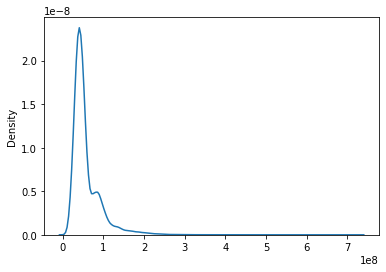

In [38]:
sns.distplot(x= info['Total UL (Bytes)'], hist=False)

<AxesSubplot:ylabel='Density'>

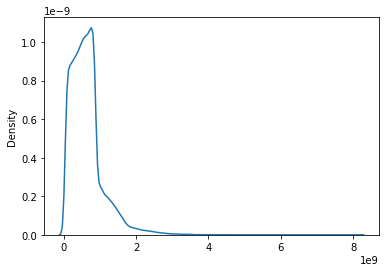

In [39]:
sns.distplot(x= info['Total DL (Bytes)'], hist=False)

<AxesSubplot:ylabel='Density'>

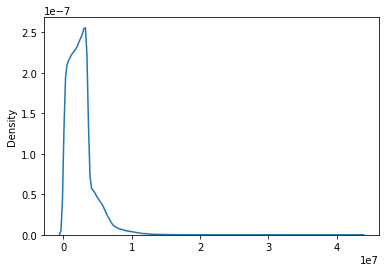

In [40]:
sns.distplot(x= data_volumes['Social media data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

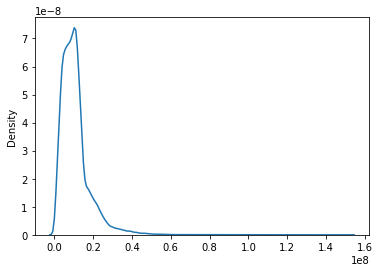

In [41]:
sns.distplot(x= data_volumes['Google data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

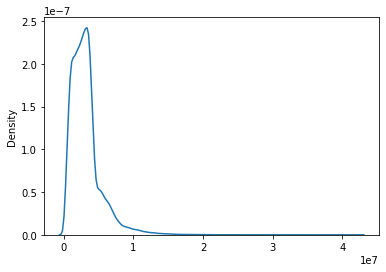

In [42]:
sns.distplot(x= data_volumes['email data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

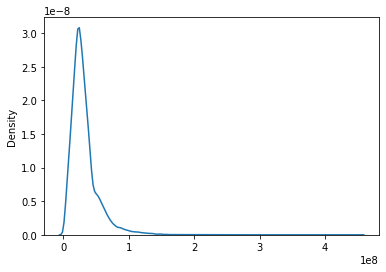

In [43]:
sns.distplot(x= data_volumes['Youtube data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

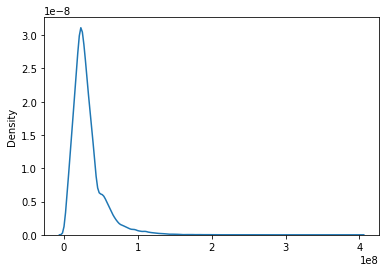

In [44]:
sns.distplot(x= data_volumes['Netflix data vol'], hist=False)

In [ ]:
sns.distplot(x= data_volumes['Other_apps data vol'], hist=False)

### Bivariate analysis

In [52]:
data_volumes.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09


In [53]:
data_volumes['Total UL+DL (Bytes)']= data_volumes['Total UL (Bytes)']+ data_volumes['Total DL (Bytes)']
data_volumes.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol,Total UL+DL (Bytes)
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08,1.391536e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08,2.321240e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08,8.517164e+07
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08,4.265016e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09,1.033092e+09


Text(0.5, 0, 'Social media data')

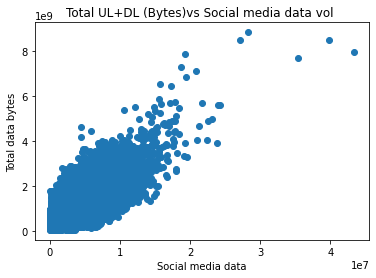

In [56]:
plt.scatter(x= data_volumes['Social media data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Social media data vol ')
plt.ylabel('Total data bytes')
plt.xlabel('Social media data')

Text(0.5, 0, 'Google data')

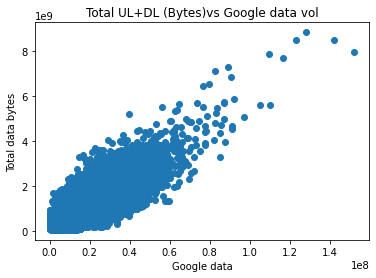

In [57]:
plt.scatter(x= data_volumes['Google data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Google data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Google data')

Text(0.5, 0, 'email data')

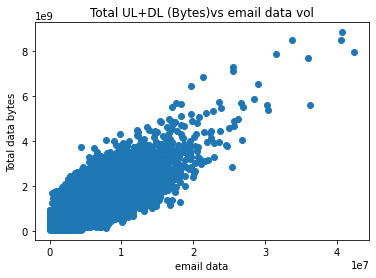

In [58]:
plt.scatter(x= data_volumes['email data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs email data vol')
plt.ylabel('Total data bytes')
plt.xlabel('email data')

Text(0.5, 0, 'Youtube data')

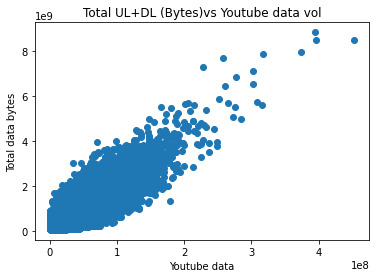

In [59]:
plt.scatter(x= data_volumes['Youtube data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Youtube data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Youtube data')

Text(0.5, 0, 'Netflix data')

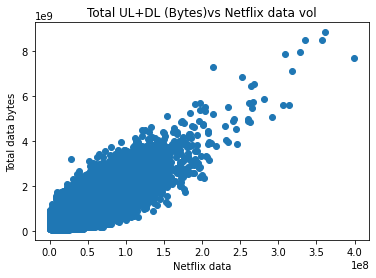

In [60]:
plt.scatter(x= data_volumes['Netflix data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Netflix data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Netflix data')

Text(0.5, 0, 'Gaming data')

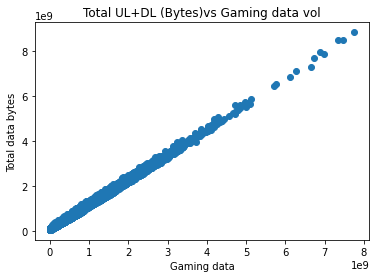

In [61]:
plt.scatter(x= data_volumes['Gaming data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Gaming data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Gaming data')

Text(0.5, 0, 'Other_apps data')

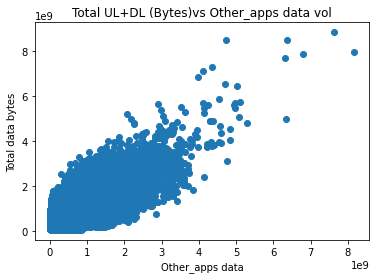

In [62]:
plt.scatter(x= data_volumes['Other_apps data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Other_apps data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Other_apps data')

In [35]:
data_volumes.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['IMSI', 'Bearer Id', 'Dur. (ms)', 'Total UL (Bytes)',
       'Total DL (Bytes)', 'Social media data vol', 'Google data vol',
       'email data vol', 'Youtube data vol', 'Netflix data vol',
       'Gaming data vol', 'Other_apps data vol'],
      dtype='object')>

### Variable transformations
segmenting the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [63]:
# segmenting the users into top five decile classes based on the total duration for all sessions
data_volumes['Segments']= pd.qcut(data_volumes['Dur. (ms)'], q=5, labels= ['class 1', 'class 2', 'class 3', 'class 4', 'classs 5'])
data_volumes.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol,Total UL+DL (Bytes),Segments
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08,1.391536e+08,classs 5
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08,2.321240e+08,classs 5
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08,8.517164e+07,class 2
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08,4.265016e+08,class 2
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09,1.033092e+09,classs 5


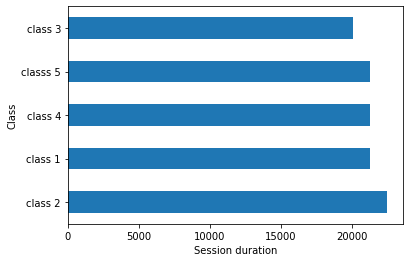

In [69]:
#Visualization
data_volumes['Segments'].value_counts().plot(kind='barh')
plt.xlabel('Session duration')
plt.ylabel('Class')
plt.show()

In [74]:
# computing the total data (DL+UL) per decile class
dataPer_segment= data_volumes.groupby(pd.qcut(data_volumes['Dur. (ms)'], q=5, labels= ['class 1', 'class 2', 'class 3', 'class 4', 'classs 5']))['Total UL+DL (Bytes)'].sum()
dataPer_segment

Dur. (ms)
class 1     1.152440e+13
class 2     1.233818e+13
class 3     1.167412e+13
class 4     1.391849e+13
classs 5    2.409768e+13
Name: Total UL+DL (Bytes), dtype: float64

### Correlation Analysis
compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [76]:
corr = data_volumes.corr()
corr=corr.drop(columns = ['IMSI', 'Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total UL+DL (Bytes)'], axis=0)
corr=corr.drop(['IMSI', 'Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total UL+DL (Bytes)'])
corr

,Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
Social media data vol,1.000000,0.643289,0.634276,0.659589,0.660080,0.590574,0.591662
Google data vol,0.643289,1.000000,0.688695,0.718857,0.716468,0.642482,0.642987
email data vol,0.634276,0.688695,1.000000,0.704919,0.705730,0.627854,0.631347
Youtube data vol,0.659589,0.718857,0.704919,1.000000,0.738643,0.657713,0.660620
Netflix data vol,0.660080,0.716468,0.705730,0.738643,1.000000,0.657634,0.656074
Gaming data vol,0.590574,0.642482,0.627854,0.657713,0.657634,1.000000,0.586691
Other_apps data vol,0.591662,0.642987,0.631347,0.660620,0.656074,0.586691,1.000000


In [77]:
len(corr.columns)

7

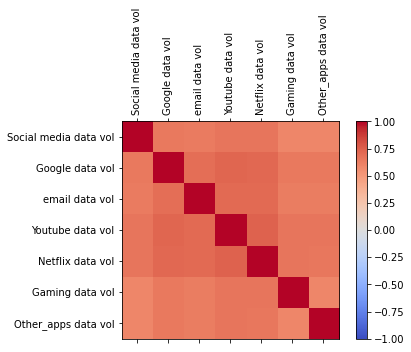

In [78]:
#Visualizing the correlation using a correlation matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

### Dimensionality Reduction


## 2.  User Engagement analysis

In [ ]:
Aggregate the sessions frequency ,the duration of the session ,the sessions total traffic (download and upload (bytes))


In [79]:
df_dropped.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,999.0,344.0,820.0,150.0,976.0,142.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),999.0,344.0,820.0,150.0,976.0,142.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),999.0,344.0,820.0,150.0,976.0,142.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.0,17.0,44.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,3330.0,37882.0,1.321510e+09,undefined,undefined,999.0,344.0,820.0,150.0,976.0,142.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,999.0,344.0,820.0,150.0,976.0,142.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [168]:
df_dropped.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [80]:
df_dropped.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb 

In [177]:
engagement = df_dropped.groupby('MSISDN/Number').aggregate({'Bearer Id': 'count', 
                                                            'Dur. (ms)': 'sum',
                                                            'Total UL (Bytes)':'sum',
                                                            'Total DL (Bytes)' :'sum'
                                                           }).reset_index()

In [178]:
engagement.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09


In [179]:
engagement['Total traffic (Bytes)']= engagement['Total UL (Bytes)']+ engagement['Total DL (Bytes)']
engagement.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09


In [180]:
# report the top 10 customers per engagement metric 
engagement.sort_values(by='Bearer Id')
engagement.head(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09
5,3.360101e+10,2,253983.0,60009249.0,5.552080e+08,6.152172e+08
6,3.360101e+10,2,128360.0,101681858.0,5.530412e+08,6.547231e+08
7,3.360101e+10,1,86399.0,38575279.0,2.940851e+08,3.326604e+08
8,3.360101e+10,2,495702.0,93572016.0,8.965602e+08,9.901322e+08
9,3.360102e+10,1,124854.0,47091008.0,6.853728e+08,7.324638e+08


In [181]:
engagement_parameters= engagement.drop(columns= ['Total UL (Bytes)', 'Total DL (Bytes)'], axis=1 )
engagement_parameters.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09


In [182]:
engagement.tail(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total traffic (Bytes)
106342,3.378995e+10,2,209051.0,87579412.0,1.452476e+09,1.540055e+09
106343,3.378996e+10,1,98826.0,49913783.0,5.958639e+08,6.457777e+08
106344,3.378996e+10,1,157069.0,36147061.0,6.741405e+08,7.102876e+08
106345,3.378997e+10,1,160461.0,34066711.0,1.740564e+08,2.081231e+08
106346,3.378998e+10,2,210389.0,70831420.0,1.023862e+09,1.094693e+09
106347,3.379000e+10,1,8810.0,26716429.0,6.879252e+08,7.146416e+08
106348,3.379000e+10,1,140988.0,35732243.0,4.445751e+08,4.803073e+08
106349,3.197021e+12,1,877385.0,37295915.0,1.948281e+08,2.321240e+08
106350,3.370000e+14,1,253030.0,56652839.0,5.396350e+08,5.962878e+08
106351,8.823971e+14,1,869844.0,60456049.0,7.869760e+07,1.391536e+08


In [183]:
engagement.dtypes

MSISDN/Number            float64
Bearer Id                  int64
Dur. (ms)                float64
Total UL (Bytes)         float64
Total DL (Bytes)         float64
Total traffic (Bytes)    float64
dtype: object

In [184]:
engagement_parameters.sort_values(by='Dur. (ms)')
engagement_parameters.head(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09
5,3.360101e+10,2,253983.0,6.152172e+08
6,3.360101e+10,2,128360.0,6.547231e+08
7,3.360101e+10,1,86399.0,3.326604e+08
8,3.360101e+10,2,495702.0,9.901322e+08
9,3.360102e+10,1,124854.0,7.324638e+08


In [185]:
engagement_parameters.sort_values(by='Total traffic (Bytes)')
engagement_parameters.tail(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
106342,3.378995e+10,2,209051.0,1.540055e+09
106343,3.378996e+10,1,98826.0,6.457777e+08
106344,3.378996e+10,1,157069.0,7.102876e+08
106345,3.378997e+10,1,160461.0,2.081231e+08
106346,3.378998e+10,2,210389.0,1.094693e+09
106347,3.379000e+10,1,8810.0,7.146416e+08
106348,3.379000e+10,1,140988.0,4.803073e+08
106349,3.197021e+12,1,877385.0,2.321240e+08
106350,3.370000e+14,1,253030.0,5.962878e+08
106351,8.823971e+14,1,869844.0,1.391536e+08


In [186]:
engagement_parameters.isna().sum()

MSISDN/Number            0
Bearer Id                0
Dur. (ms)                0
Total traffic (Bytes)    0
dtype: int64

In [144]:
engagement_parameters['Total traffic (Bytes)'].fillna(engagement_parameters['Total traffic (Bytes)'].median(), inplace=True)

In [145]:
engagement_parameters.isna().sum()

MSISDN/Number            0
Bearer Id                0
Dur. (ms)                0
Total traffic (Bytes)    0
dtype: int64

In [191]:
#Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.
from sklearn.preprocessing import MinMaxScaler

def data_normalizer(df,columns):
    for col in columns:
        df[col]= MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))
    return df


In [165]:
engagement_parameters.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,1.391536e+08
1,3.360100e+10,1,181230.0,2.321240e+08
2,3.360100e+10,1,134969.0,8.517164e+07
3,3.360101e+10,1,49878.0,4.265016e+08
4,3.360101e+10,2,37104.0,1.033092e+09


In [188]:
engagement_parameters.isna().sum()

MSISDN/Number            0
Bearer Id                0
Dur. (ms)                0
Total traffic (Bytes)    0
dtype: int64

In [192]:
normalized_df = data_normalizer(engagement_parameters, ['Total traffic (Bytes)','Dur. (ms)', 'Bearer Id'])

In [193]:
normalized_df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
0,3.360100e+10,0.000000,0.005908,0.095931
1,3.360100e+10,0.000000,0.009387,0.014026
2,3.360100e+10,0.000000,0.006892,0.063851
3,3.360101e+10,0.000000,0.002304,0.044148
4,3.360101e+10,0.058824,0.001615,0.161598


In [200]:
 # k-means (k=3) to classify customers in three groups of engagement.
from sklearn.cluster import KMeans
import random as rd


kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_df)
kmeans.labels_


array([0, 0, 0, ..., 0, 2, 1])

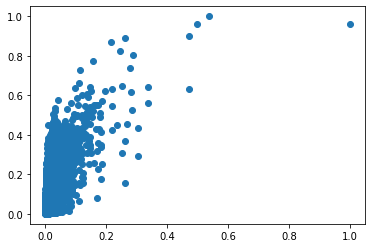

In [198]:
plt.scatter(normalized_df['Dur. (ms)'],normalized_df['Total traffic (Bytes)'])

In [209]:
import random
from random import sample

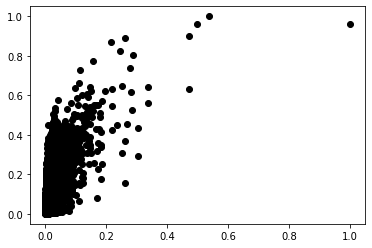

In [239]:
X = normalized_df
#Visualise data points
plt.scatter(X['Dur. (ms)'],X['Total traffic (Bytes)'],c='black')

plt.show()

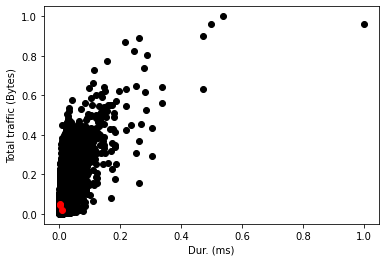

In [242]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['Dur. (ms)'],X['Total traffic (Bytes)'],c='black')
plt.scatter(Centroids['Dur. (ms)'],Centroids['Total traffic (Bytes)'],c='red')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total traffic (Bytes)')
plt.show()

In [243]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['Dur. (ms)']-row_d['Dur. (ms)'])**2
            d2=(row_c['Total traffic (Bytes)']-row_d['Total traffic (Bytes)'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[['Total traffic (Bytes)','Dur. (ms)']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Total traffic (Bytes)'] - Centroids['Total traffic (Bytes)']).sum() + (Centroids_new['Dur. (ms)'] - Centroids['Dur. (ms)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[['Total traffic (Bytes)','Dur. (ms)']]

0.026515673537867015
0.02624521539779429
0.03171243510619541
0.03308103919488856
0.020576305151059706
0.013893617504259256
0.009712860488220686
0.006523196819661355
0.004885210310535227
0.003483079269635785
0.002705105208079323
0.0018302914185195597
0.0013806337642749567
0.0008798746296566247
0.0007417300240728439


KeyboardInterrupt: 

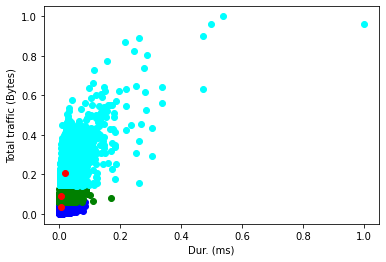

In [244]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data['Dur. (ms)'],data['Total traffic (Bytes)'],c=color[k])
plt.scatter(Centroids['Dur. (ms)'],Centroids['Total traffic (Bytes)'],c='red')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total traffic (Bytes)')
plt.show()

## 3.  Experience Analytics


In [ ]:
Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
Average TCP retransmission
Average RTT
Handset type
Average throughput


In [245]:
df_dropped.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb 

In [248]:
df_dropped.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,999.0,344.0,820.0,150.0,976.0,142.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),999.0,344.0,820.0,150.0,976.0,142.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),999.0,344.0,820.0,150.0,976.0,142.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.0,17.0,44.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,3330.0,37882.0,1.321510e+09,undefined,undefined,999.0,344.0,820.0,150.0,976.0,142.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,999.0,344.0,820.0,150.0,976.0,142.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [250]:
exp_df= df_dropped.groupby('MSISDN/Number').aggregate({'TCP DL Retrans. Vol (Bytes)': 'sum', 
                                                            'TCP UL Retrans. Vol (Bytes)': 'sum',
                                                            'Avg RTT UL (ms)':'sum',
                                                            'Avg RTT DL (ms)' :'sum',
                                                            'Avg Bearer TP DL (kbps)':'sum',
                                                            'Avg Bearer TP UL (kbps)':'sum',
                                                            'Handset Type':'count'
                                                             }).reset_index()

In [251]:
exp_df.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT UL (ms),Avg RTT DL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,3.360100e+10,21030583.0,771882.0,0.0,46.0,37.0,39.0,1
1,3.360100e+10,21030583.0,771882.0,1.0,30.0,48.0,51.0,1
2,3.360100e+10,21030583.0,771882.0,17.0,105.0,48.0,49.0,1
3,3.360101e+10,1066.0,771882.0,15.0,69.0,204.0,44.0,1
4,3.360101e+10,30380213.0,793084.0,5.0,114.0,40395.0,16449.0,2


In [252]:
#creating a dict with columns to be combined
columns = {'Average TCP retransmission':['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'],
           'Average RTT':['Avg RTT UL (ms)', 'Avg RTT DL (ms)'],
           'Average throughput':['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
          }
experience_df= combine_columns(columns,exp_df)
experience_df.head()

,MSISDN/Number,Handset Type,Average TCP retransmission,Average RTT,Average throughput
0,3.360100e+10,1,21802465.0,46.0,76.0
1,3.360100e+10,1,21802465.0,31.0,99.0
2,3.360100e+10,1,21802465.0,122.0,97.0
3,3.360101e+10,1,772948.0,84.0,248.0
4,3.360101e+10,2,31173297.0,119.0,56844.0


In [256]:
experience_df.columns.tolist()

['MSISDN/Number',
 'Handset Type',
 'Average TCP retransmission',
 'Average RTT',
 'Average throughput']

In [260]:
experience_df[['Average TCP retransmission', 'Average RTT', 'Average throughput']].describe()

,Average TCP retransmission,Average RTT,Average throughput
count,1.063520e+05,106352.000000,106352.000000
mean,3.041136e+07,171.980151,21009.259346
std,1.537330e+08,661.167041,42500.194763
min,9.700000e+01,0.000000,0.000000
25%,7.517235e+06,47.000000,97.000000
50%,2.180246e+07,94.000000,290.000000
75%,2.181621e+07,139.000000,26530.500000
max,8.354209e+09,96924.000000,902222.000000


In [265]:
# function to calculate interquartile range
def find_iqr(x):
    IQR= np.subtract(*np.percentile(x, [75, 25]))
    return IQR

#calculate IQR for 'Average TCP retransmission', 'Average RTT', 'Average throughput' columns
experience_df[['Average TCP retransmission', 'Average RTT', 'Average throughput']].apply(find_iqr)

Average TCP retransmission    14298978.25
Average RTT                         92.00
Average throughput               26433.50
dtype: float64

In [281]:
import statistics

In [291]:
experience_df['Average TCP retransmission'].values

array([21802465., 21802465., 21802465., ..., 21802465., 21802465.,
       21802465.])

In [304]:
# Function to remove outliers
def find_outliers(x):
    Q1= np.percentile(x, 25, interpolation = 'midpoint')
    Q3= np.percentile(x, 75, interpolation = 'midpoint')
    IQR= np.subtract(*np.percentile(x, [75, 25]))
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    
     #replacing outliers with the mean
    for item in x:
        if df.at
            
    H_outlier= df.loc[df.x >= upper, (x+statistics.mean(x))].tolist()
    L_outlier= df.loc[df.x <= lower, (x+statistics.mean(x))].tolist()                 
            
    
   



IndentationError: expected an indented block after 'if' statement on line 11 (611819914.py, line 13)

In [303]:
find_outliers(experience_df,experience_df['Average TCP retransmission'])


AttributeError: 'DataFrame' object has no attribute 'x'

In [295]:
experience_df[['Average TCP retransmission', 'Average RTT', 'Average throughput']].apply(find_outliers)

KeyboardInterrupt: 